In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Lapcarts\OneDrive\Amazon Sales data.csv")

In [3]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
df.info

<bound method DataFrame.info of                                Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household

In [5]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [6]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Extract month and year from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year-Month'] = df['Order Date'].dt.to_period('M')


In [7]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Order Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64,2015,2,2015-02
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,2011-04-27,4187,668.27,502.54,2798046.49,2104134.98,693911.51,2011,4,2011-04
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,2012-07-27,8082,154.06,90.93,1245112.92,734896.26,510216.66,2012,7,2012-07
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,2015-08-25,6070,81.73,56.67,496101.10,343986.90,152114.20,2015,7,2015-07
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,2014-05-30,6593,205.70,117.11,1356180.10,772106.23,584073.87,2014,4,2014-04


In [8]:
df.dtypes

Region                      object
Country                     object
Item Type                   object
Sales Channel               object
Order Priority              object
Order Date          datetime64[ns]
Order ID                     int64
Ship Date           datetime64[ns]
Units Sold                   int64
Unit Price                 float64
Unit Cost                  float64
Total Revenue              float64
Total Cost                 float64
Total Profit               float64
Order Year                   int64
Order Month                  int64
Order Year-Month         period[M]
dtype: object

# Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set(style="whitegrid")

# # Aggregating Data for Sales Trend Analysis

In [11]:
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()
year_monthly_sales = df.groupby('Order Year-Month')['Total Revenue'].sum()


Plotting Monthly Sales Trend

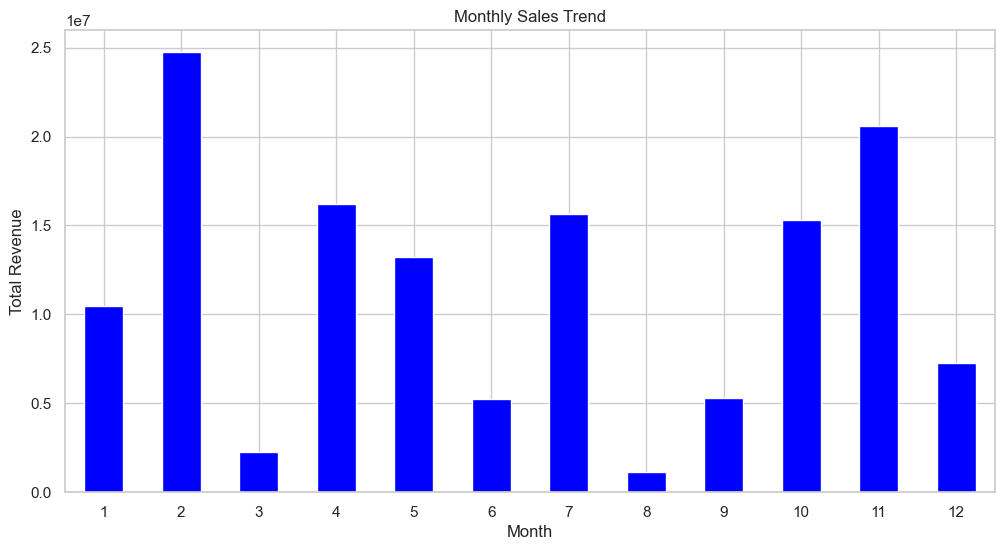

In [12]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

Plotting Yearly Sales Trend

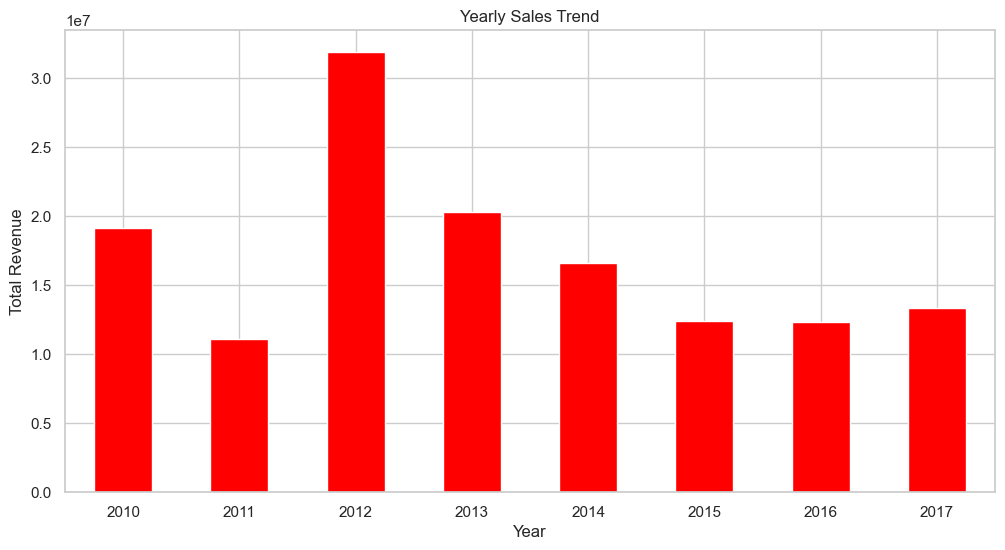

In [13]:
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='red')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

Plotting Yearly-Monthly Sales Trend 

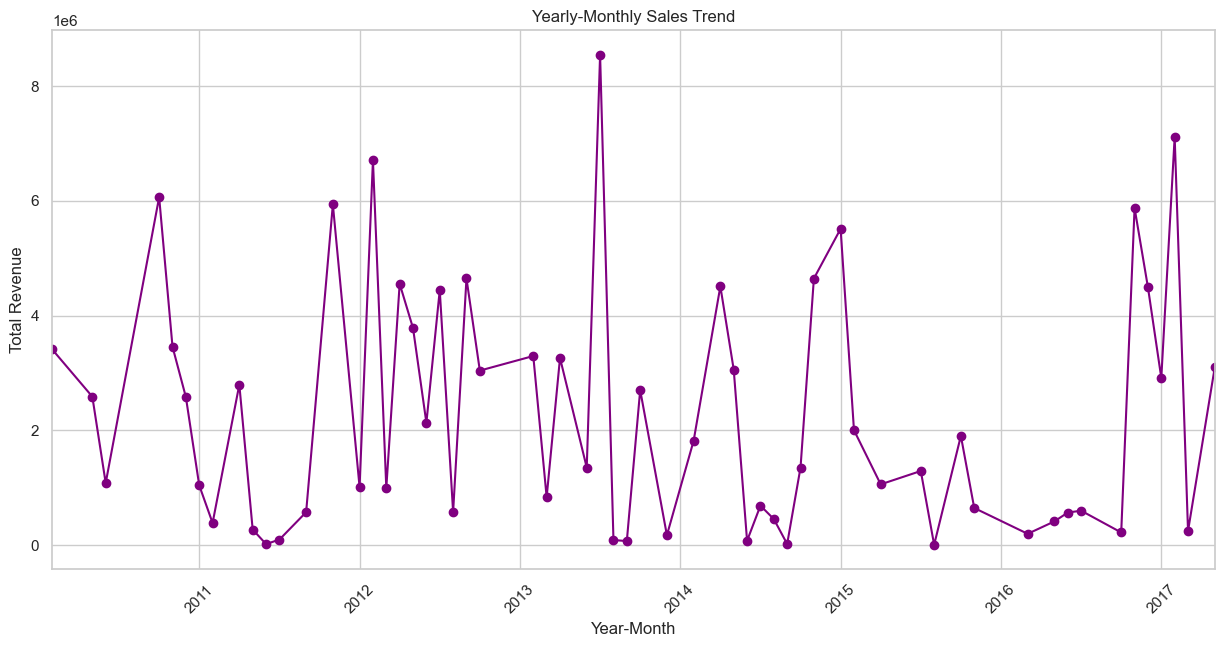

In [14]:
plt.figure(figsize=(15, 7))
year_monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [15]:
df['Order Year'] = df['Order Date'].dt.year

In [16]:
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum().reset_index()

In [17]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Order Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


<Figure size 1200x600 with 0 Axes>

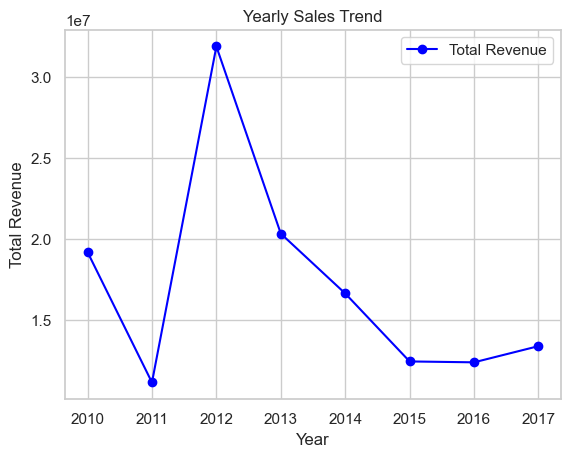

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
yearly_sales.plot(x='Order Year', y='Total Revenue', marker='o', color='blue', legend=True)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Calculate total sales


In [19]:
total_sales = df['Total Revenue'].sum()
total_sales

137348768.31

Calculate average order value

In [20]:
average_order_value = df['Total Revenue'].mean()
average_order_value

1373487.6831

# Total sales and Average order value

In [21]:
print("Total Sales:", total_sales)
print("Average Order Value:", average_order_value)

Total Sales: 137348768.31
Average Order Value: 1373487.6831


## correlation Analysis

In [22]:
df=pd.read_csv(r"C:\Users\Lapcarts\OneDrive\Amazon Sales data.csv")

In [23]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [24]:
df = df['Units Sold'].corr(df['Total Revenue'])

In [25]:
df

0.4477844902616836

In [26]:
df=pd.read_csv(r"C:\Users\Lapcarts\OneDrive\Amazon Sales data.csv")

In [27]:
df = df['Unit Cost'].corr(df['Total Profit'])

In [28]:
df

0.46721391120731015

In [29]:
df=pd.read_csv(r"C:\Users\Lapcarts\OneDrive\Amazon Sales data.csv")

In [30]:
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
df = df[numerical_columns]


In [31]:
df = df[numerical_columns]

In [32]:
df

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,2804,205.70,117.11,576782.80,328376.44,248406.36
2,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,8102,9.33,6.92,75591.66,56065.84,19525.82
4,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...
95,888,109.28,35.84,97040.64,31825.92,65214.72
96,6267,9.33,6.92,58471.11,43367.64,15103.47
97,1485,154.06,90.93,228779.10,135031.05,93748.05
98,5767,81.73,56.67,471336.91,326815.89,144521.02


In [33]:
correlation_matrix = df.corr()

In [34]:
correlation_matrix

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


In [35]:
units_sold_total_revenue_corr = correlation_matrix.loc['Units Sold', 'Total Revenue']

In [36]:
units_sold_total_revenue_corr

0.4477844902616838

 # Visualizing the correlation matrix

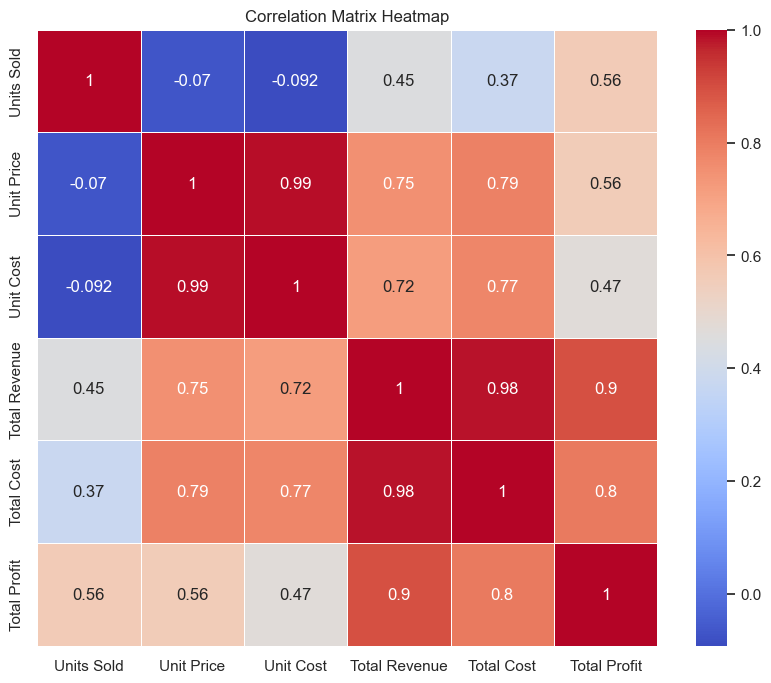

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Engineering

## Sales and Profit Features

In [39]:
df['Revenue Per Unit'] = df['Total Revenue'] / df['Units Sold']
df['Profit Per Unit'] = df['Total Profit'] / df['Units Sold']
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']


In [40]:
df

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Revenue Per Unit,Profit Per Unit,Profit Margin
0,9925,255.28,159.42,2533654.00,1582243.50,951410.50,255.28,95.86,0.375509
1,2804,205.70,117.11,576782.80,328376.44,248406.36,205.70,88.59,0.430676
2,1779,651.21,524.96,1158502.59,933903.84,224598.75,651.21,126.25,0.193870
3,8102,9.33,6.92,75591.66,56065.84,19525.82,9.33,2.41,0.258307
4,5062,651.21,524.96,3296425.02,2657347.52,639077.50,651.21,126.25,0.193870
...,...,...,...,...,...,...,...,...,...
95,888,109.28,35.84,97040.64,31825.92,65214.72,109.28,73.44,0.672035
96,6267,9.33,6.92,58471.11,43367.64,15103.47,9.33,2.41,0.258307
97,1485,154.06,90.93,228779.10,135031.05,93748.05,154.06,63.13,0.409775
98,5767,81.73,56.67,471336.91,326815.89,144521.02,81.73,25.06,0.306619


## Distribution of Revenue Per Unit

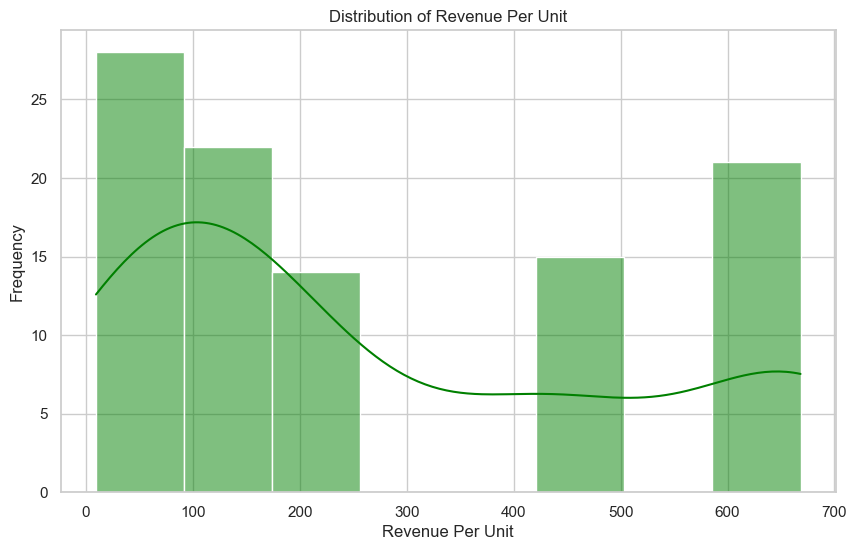

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue Per Unit'],kde=True, color='green')
plt.title('Distribution of Revenue Per Unit')
plt.xlabel('Revenue Per Unit')
plt.ylabel('Frequency')
plt.show()

## Distribution of Profit Per Unit

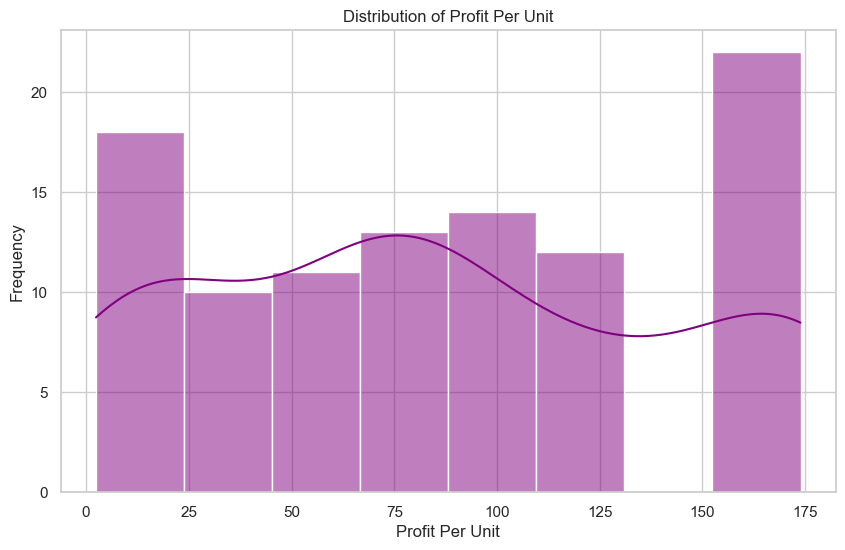

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit Per Unit'], kde=True, color='purple')
plt.title('Distribution of Profit Per Unit')
plt.xlabel('Profit Per Unit')
plt.ylabel('Frequency')
plt.show()

## Profit Margin by Item Type

In [52]:
df=pd.read_csv(r"C:\Users\Lapcarts\OneDrive\Amazon Sales data.csv")

In [54]:
df['Revenue Per Unit'] = df['Total Revenue'] / df['Units Sold']
df['Profit Per Unit'] = df['Total Profit'] / df['Units Sold']
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']

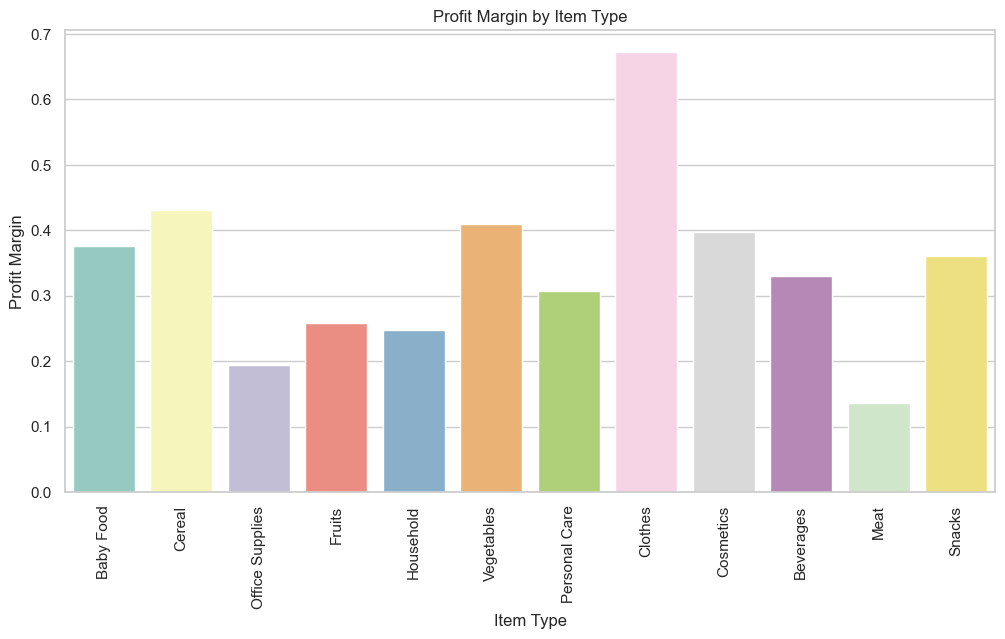

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Type', y='Profit Margin', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Profit Margin by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Profit Margin')
plt.show()


## Total Revenue by Region

C:\Users\Lapcarts\AppData\Local\Temp\ipykernel_1568\2474340605.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Total Revenue', data=df, estimator=sum, ci=None, palette='viridis')


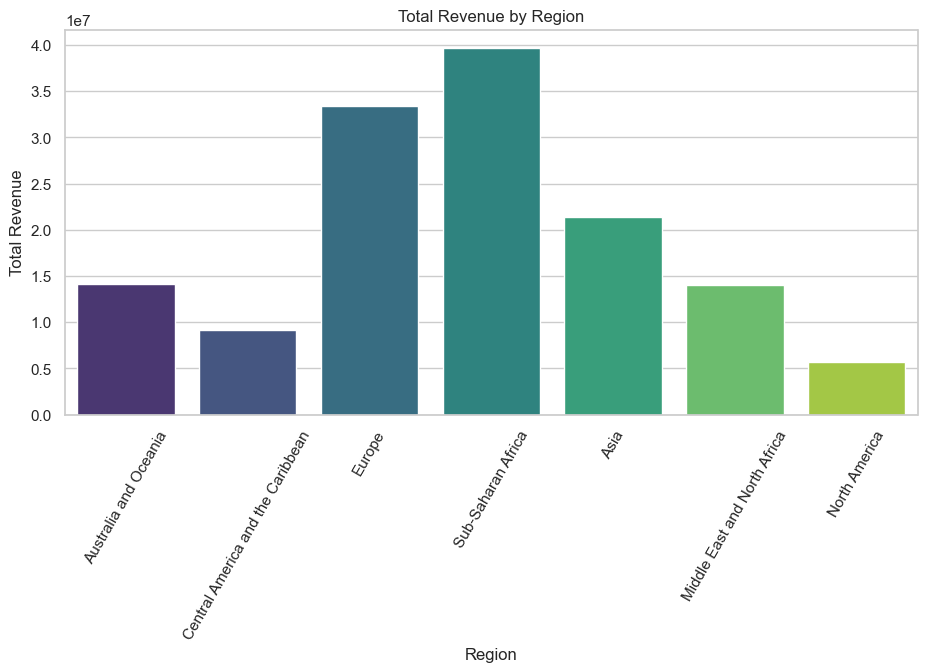

In [61]:
plt.figure(figsize=(11, 5))
sns.barplot(x='Region', y='Total Revenue', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=60)
plt.show()


## Scatter Plot of Units Sold vs. Total Revenue

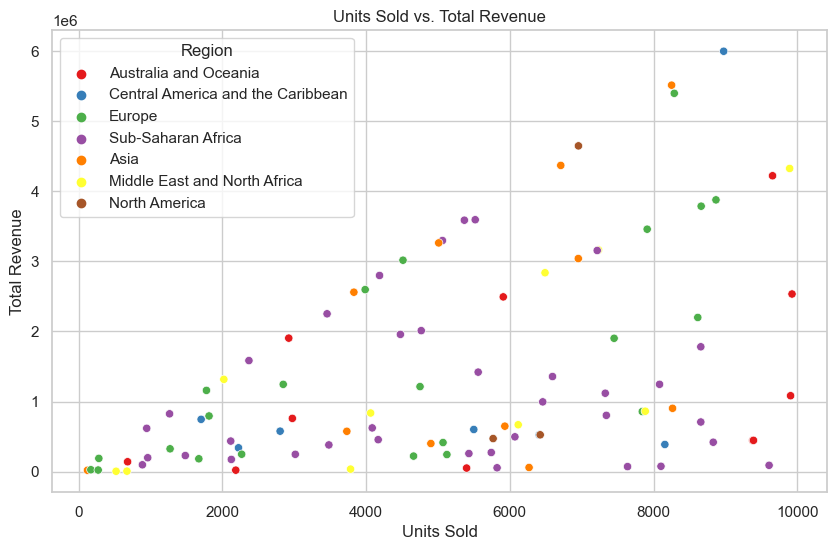

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df, hue='Region', palette='Set1')
plt.title('Units Sold vs. Total Revenue')# Pair Plot of Sales and Profit Features
sns.pairplot(sales_profit_features)
plt.suptitle('Pair Plot of Sales and Profit Features', y=1.02)
plt.show()

plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()
